# Understanding Over & Underfitting
## Predicting Boston Housing Prices

## Getting Started
In this project, you will use the Boston Housing Prices dataset to build several models to predict the prices of homes with particular qualities from the suburbs of Boston, MA.
We will build models with several different parameters, which will change the goodness of fit for each. 

---
## Data Exploration
Since we want to predict the value of houses, the **target variable**, `'MEDV'`, will be the variable we seek to predict.

### Import and explore the data. Clean the data for outliers and missing values. 

In [9]:
pwd

'/Users/ayubpathan/Desktop/ironhack/week7/lab-problems-with-ML/your-code'

In [18]:
import pandas as pd
import numpy as np
from scipy import stats
import seaborn as sns
import matplotlib.pyplot as plt

In [19]:
# Your code here
boston = pd.read_csv('/Users/ayubpathan/Desktop/ironhack/week7/lab-problems-with-ML/data/boston_data.csv')

In [20]:
boston.head()

,crim,zn,indus,chas,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.0,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.0,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.0,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.0,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.0,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [77]:
boston['chas'].value_counts()

0.0    376
1.0     28
Name: chas, dtype: int64

In [78]:
boston.drop(['chas'], axis=1, inplace=True)

<AxesSubplot:>

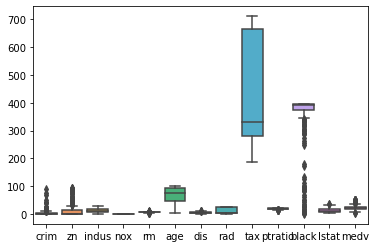

In [79]:
sns.boxplot(data=boston)

In [80]:
# checking outliers with the help of Z-score method: with threshold of 3
z = np.abs(stats.zscore(boston))
threshold = 3
print(np.where(z > 3))

(array([ 14,  20,  28,  29,  34,  36,  38,  53,  57,  62,  70,  71,  88,
        89,  91, 101, 106, 111, 111, 112, 114, 116, 141, 148, 160, 160,
       161, 170, 170, 177, 184, 192, 196, 200, 200, 212, 214, 223, 226,
       232, 234, 241, 246, 251, 251, 252, 252, 258, 258, 272, 272, 273,
       273, 285, 285, 303, 304, 312, 314, 314, 321, 333, 337, 347, 352,
       355, 380, 382, 400, 400, 401, 401, 402]), array([10, 10,  1,  6,  0, 12, 10,  1,  1, 10,  1, 12, 12,  4, 10,  1,  1,
        1,  6,  1,  0,  0, 10,  4,  1, 12,  6, 10, 11,  4, 10,  1, 10,  4,
       12,  1, 10, 10, 12,  1,  4, 10, 10,  1,  6,  1,  6, 10, 11,  4, 12,
        0, 10,  0, 10,  4, 10, 10,  1, 12,  1, 10,  1, 12, 12, 10,  0, 12,
        0, 10,  1, 12,  1]))


In [81]:
# filtering outliers with z-score
boston_cleaned = boston[(z<3).all(axis=1)]

In [82]:
#before cleaning outliers
boston.shape

(404, 13)

In [83]:
#after cleaning outliers
boston_cleaned.shape

(344, 13)

In [84]:
#check if we have NAN
boston_cleaned.isnull().sum()


crim       0
zn         0
indus      0
nox        0
rm         0
age        0
dis        0
rad        0
tax        0
ptratio    0
black      0
lstat      0
medv       0
dtype: int64

### Next, we want to explore the data. Pick several varibables you think will be most correlated with the prices of homes in Boston, and create plots that show the data dispersion as well as the regression line of best fit.
**Hint:** Use the Seaborn *pairplot* function ([documentation](https://seaborn.pydata.org/generated/seaborn.pairplot.html))

In [85]:
boston_cleaned.head()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
0,0.15876,0.0,10.81,0.413,5.961,17.5,5.2873,4.0,305.0,19.2,376.94,9.88,21.7
1,0.10328,25.0,5.13,0.453,5.927,47.2,6.9320,8.0,284.0,19.7,396.90,9.22,19.6
2,0.34940,0.0,9.90,0.544,5.972,76.7,3.1025,4.0,304.0,18.4,396.24,9.97,20.3
3,2.73397,0.0,19.58,0.871,5.597,94.9,1.5257,5.0,403.0,14.7,351.85,21.45,15.4
4,0.04337,21.0,5.64,0.439,6.115,63.0,6.8147,4.0,243.0,16.8,393.97,9.43,20.5


In [87]:
#selecting variables those could be correlated witht the prices of homes in Boston:
boston_new = boston_cleaned.iloc[:, [0,5,6,9,10,11,12]]
boston_new

,crim,age,dis,ptratio,black,lstat,medv
0,0.15876,17.5,5.2873,19.2,376.94,9.88,21.7
1,0.10328,47.2,6.9320,19.7,396.90,9.22,19.6
2,0.34940,76.7,3.1025,18.4,396.24,9.97,20.3
3,2.73397,94.9,1.5257,14.7,351.85,21.45,15.4
4,0.04337,63.0,6.8147,16.8,393.97,9.43,20.5
...,...,...,...,...,...,...,...
396,0.06899,69.7,2.2577,19.1,389.15,14.37,22.0
397,0.10084,81.6,2.6775,17.8,395.59,10.16,22.8
398,0.67191,90.3,4.6820,21.0,376.88,14.81,16.6
399,9.32909,98.7,2.2616,20.2,396.90,18.13,14.1


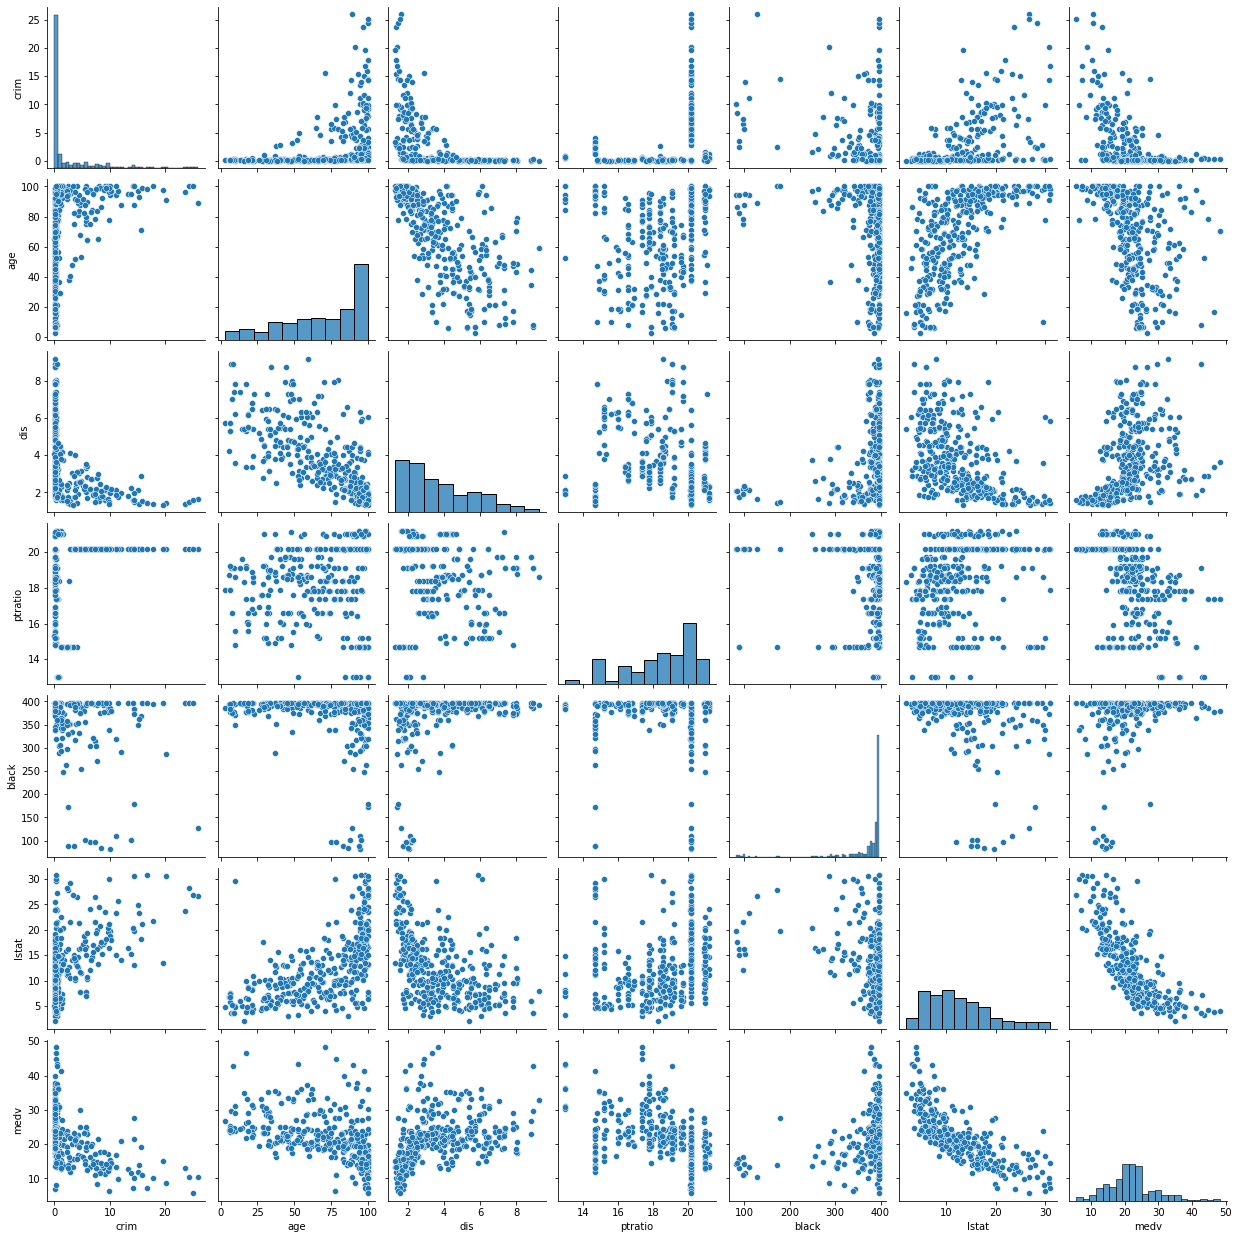

In [88]:
# Your code here
sns.pairplot(boston_new)

### What do these plots tell you about the relationships between these variables and the prices of homes in Boston? Are these the relationships you expected to see in these variables?

#### Your response here
It is very clear that age and avg value are correlated. Apart from that, lstat and medv shows clear trend of correlation. However, Indusm and ptratio do not show good correlation which was not expected.

### Make a heatmap of the remaining variables. Are there any variables that you did not consider that have very high correlations? What are they?

<AxesSubplot:>

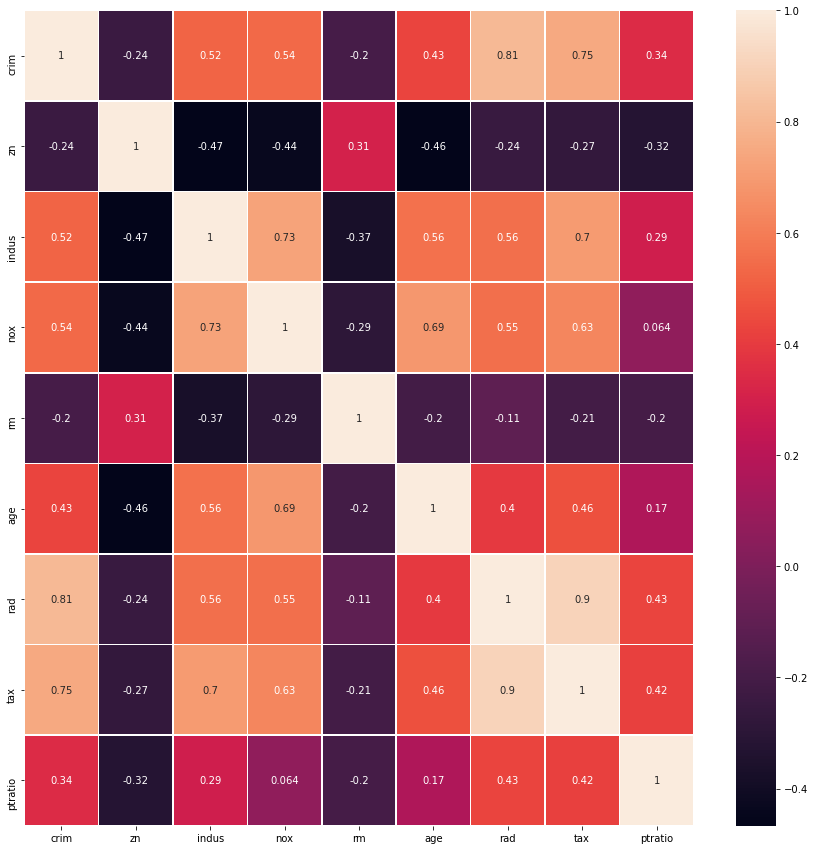

In [89]:
# Your response here
boston_heatmap = boston_cleaned.iloc[:, [0,1,2,3,4,5,7,8,9]]
fig, ax = plt.subplots(figsize=(15,15)) 
sns.heatmap(boston_heatmap.corr(), annot=True, linewidths=.7)

From the heatmap, it can be seen that there is very high correlation between tax & rad, rad & crim

### Calculate Statistics
Calculate descriptive statistics for housing price. Include the minimum, maximum, mean, median, and standard deviation.
**Hint:** Use the Pandas *series.describe* method ([documentation](https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.Series.describe.html))

In [90]:
# Your code here
boston_cleaned.describe()

,crim,zn,indus,nox,rm,age,dis,rad,tax,ptratio,black,lstat,medv
count,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000,344.000000
mean,2.450686,7.226744,11.111017,0.554299,6.258157,68.745058,3.754371,9.026163,395.613372,18.472384,372.805756,12.605669,21.870349
std,4.615743,15.207775,6.614872,0.115187,0.569417,27.481065,1.862511,8.305530,164.333352,2.043084,56.255129,6.433283,7.049946
min,0.006320,0.000000,1.250000,0.400000,4.368000,2.900000,1.316300,1.000000,188.000000,13.000000,81.330000,1.980000,5.600000
25%,0.086420,0.000000,5.860000,0.459500,5.890500,47.900000,2.197850,4.000000,279.000000,17.400000,378.000000,7.537500,17.800000
50%,0.223505,0.000000,8.560000,0.524000,6.215500,74.950000,3.346000,5.000000,311.000000,18.850000,392.110000,11.395000,21.400000
75%,2.447393,0.000000,18.100000,0.614000,6.563500,94.025000,4.978850,8.000000,437.000000,20.200000,396.352500,16.312500,24.700000
max,25.940600,75.000000,27.740000,0.871000,8.266000,100.000000,9.222900,24.000000,711.000000,21.200000,396.900000,30.810000,48.300000


----

## Developing a Model

### Implementation: Define a Performance Metric
What is the performance metric with which you will determine the performance of your model? Create a function that calculates this performance metric, and then returns the score. 

In [108]:
from sklearn.metrics import r2_score, mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    return r2_score(y_true, y_predict)



Principal Component Analysis is a mathematical technique used for dimensionality reduction. Its goal is to reduce the number of features whilst keeping most of the original information

### Implementation: Shuffle and Split Data
Split the data into the testing and training datasets. Shuffle the data as well to remove any bias in selecting the traing and test (include a *random_state* parameter, see [train_test_split](https://scikit-learn.org/stable/modules/generated/sklearn.model_selection.train_test_split.html)).

In [109]:
# Your code here
from sklearn.model_selection import train_test_split
X = boston.drop(labels='medv', axis=1)
y = boston['medv']
X_train, X_test, y_train, y_test= train_test_split(X, y, test_size=0.2, random_state = 24)

----

## Analyzing Model Performance
Next, we are going to build a Random Forest Regressor, and test its performance with several different parameter settings.

### Learning Curves
Lets build the different models. Set the max_depth parameter to 2, 4, 6, 8, and 10 respectively. 

In [110]:
# Your code here
from sklearn.ensemble import RandomForestRegressor
depth_param = [2, 4, 6, 8, 10]
train_scores = []
test_scores = []

for d in depth_param:
    # initialize model
    rfr = RandomForestRegressor(max_depth=d)
    # fit
    rfr.fit(X_train, y_train)
    # predict test
    y_pred_test = rfr.predict(X_test)
    # predict train
    y_pred_train = rfr.predict(X_train)
    
    # get scores
    test_score = performance_metric(y_test, y_pred_test)
    train_score = performance_metric(y_train, y_pred_train)
    
    train_scores += [train_score]
    test_scores += [test_score]


Now, plot the score for each tree on the training set and on the testing set.

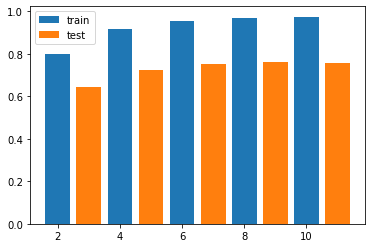

In [111]:
# Your code here
plt.bar(x=depth_param, height=train_scores, label='train')
# plot test scores
plt.bar(x=[d+1 for d in depth_param], height=test_scores, label='test')
plt.legend()

What do these results tell you about the effect of the depth of the trees on the performance of the model?

From the above plot it seem that depth of the trees doesn't change much the performance of the model.
But it seems that there is an overfitting as testing set improves but testing does not show big change.

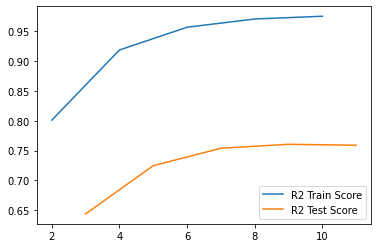

In [115]:
# Produce a plot with the score for the testing and training for the different max depths

plt.plot(depth_param, train_scores, label='R2 Train Score')
# plot test scores
plt.plot([d+1 for d in depth_param], test_scores, label='R2 Test Score')
plt.legend()

### Bias-Variance Tradeoff
When the model is trained with a maximum depth of 1, does the model suffer from high bias or from high variance? How about when the model is trained with a maximum depth of 10?

In [118]:
from sklearn.metrics import r2_score, mean_squared_error

def performance_metric(y_true, y_predict):
    """ Calculates and returns the performance score between 
        true and predicted values based on the metric chosen. """
    
    return mean_squared_error(y_true, y_predict)

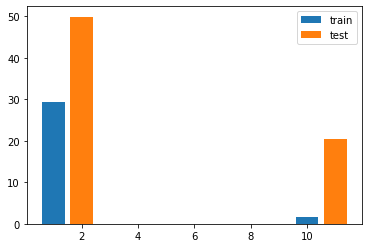

In [119]:
# Your code here
from sklearn.ensemble import RandomForestRegressor
depth_param = [1,10]
train_scores = []
test_scores = []

for d in depth_param:
    # initialize model
    rfr = RandomForestRegressor(max_depth=d)
    # fit
    rfr.fit(X_train, y_train)
    # predict test
    y_pred_test = rfr.predict(X_test)
    # predict train
    y_pred_train = rfr.predict(X_train)
    
    # get scores
    test_score = performance_metric(y_test, y_pred_test)
    train_score = performance_metric(y_train, y_pred_train)
    
    train_scores += [train_score]
    test_scores += [test_score]

plt.bar(x=depth_param, height=train_scores, label='train')
# plot test scores
plt.bar(x=[d+1 for d in depth_param], height=test_scores, label='test')
plt.legend()

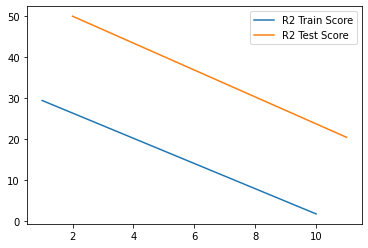

In [120]:
plt.plot(depth_param, train_scores, label='R2 Train Score')
# plot test scores
plt.plot([d+1 for d in depth_param], test_scores, label='R2 Test Score')
plt.legend()

###### Your response here
Model has very high variance in this case

### Best-Guess Optimal Model
What is the max_depth parameter that you think would optimize the model? Run your model and explain its performance.

##### Your response here
From above result, it is clear that model is suffering from overfitting and there are very high differences between MSE score of train fitting and test fitting. I think 2 would be a good option as depth parameter.

### Applicability
*In a few sentences, discuss whether the constructed model should or should not be used in a real-world setting.*  
**Hint:** Some questions to answering:
- *How relevant today is data that was collected from 1978?*
- *Are the features present in the data sufficient to describe a home?*
- *Is the model robust enough to make consistent predictions?*
- *Would data collected in an urban city like Boston be applicable in a rural city?*

In [122]:
# Your response here
from sklearn.datasets import load_boston
boston_features = load_boston()
print(boston_features.DESCR)

.. _boston_dataset:

Boston house prices dataset
---------------------------

**Data Set Characteristics:**  

    :Number of Instances: 506 

    :Number of Attributes: 13 numeric/categorical predictive. Median Value (attribute 14) is usually the target.

    :Attribute Information (in order):
        - CRIM     per capita crime rate by town
        - ZN       proportion of residential land zoned for lots over 25,000 sq.ft.
        - INDUS    proportion of non-retail business acres per town
        - CHAS     Charles River dummy variable (= 1 if tract bounds river; 0 otherwise)
        - NOX      nitric oxides concentration (parts per 10 million)
        - RM       average number of rooms per dwelling
        - AGE      proportion of owner-occupied units built prior to 1940
        - DIS      weighted distances to five Boston employment centres
        - RAD      index of accessibility to radial highways
        - TAX      full-value property-tax rate per $10,000
        - PTRATIO  pu

From the obtained information, it looks like that data is not new and there should be more features those are correleate to prices of the house rather than age, radius, crime. The model we created is for old data and wont be a good fit/application for new data and hence we should go for other model prediction.